### 本征正交分解 POD
本征正交分解（Proper orthogonal decomposition，POD）是一种流场数据处理和分析的常见降维方法，POD方法首次被Lumley引入以研究和提取湍流流场的相干结构，Sirovich在此基础上提出了基于快照的POD方法，将POD方法简化为一个基于SVD的数据驱动的求解过程。POD方法也被称为Karhunen–Loève，为高维数据提供了一种以最少数量的基函数来捕捉尽可能多能量的方法。POD方法和PCA方法密切相关，其计算得到的特征系数等价于PCA方法得到的低维特征。由于POD方法可以得到给定流场数据的一组最佳基函数，因此早期的应用研究中，得到的POD模态通常是空间和时间或频率的函数，其分解框架可以写成如下形式：

$$\bm u(\bm x, t) - \bar{\bm u}(x) = \sum_j a_j \bm\phi_j(\bm\xi, t)$$

式中 $\bar{\bm u}$——时均化的平均场$\bm\phi_j(\bm\xi, t), a_j$——分别对应于分解模态和展开的系数而在流体力学的研究中模态分解研究更多关注于将时间和空间分开考虑的方式，因此空间模态的关注度更高。

$$\bm u(\bm x, t) - \bar{\bm u}(x) = \sum_j a_j(t) \bm\phi_j(\bm\xi)$$

这里的展开系数$a_j(t)$则是时间相关的，而分解模态$\bm\phi_j(\bm\xi)$只和空间相相关。上式采用了分离变量的方法，因此该分解不是对所有问题都适用。Holmes指出分解模态所包含的信息以及应采用的模态分解框架，应综合考虑流场的属性以及使用这些分解模态所研究的内容有关。POD方法被应用于许多经典流动和实际工程示例的流场分析中，例如：圆柱绕流、可压缩开放方腔流、机翼上的湍流分离流、湍流射流等。POD方法作为模态分解方法的基石被应用于众多流动中，其分解模态的最重要属性是正交性，这有助于构建一个低维的、稀疏的模型。

### POD计算

POD目标是找到一组正交基函数，使得数据可以高效地投影到基函数上，从而实现降维和特征提取。

假设我们有一个大小为$m\times n$的数据集$\bm X$:
1. 如果数据包含偏移（如非零均值），需要将数据中心化，即去掉均值。
   $$\bm X_{centered} = \bm X - \bm{\bar{X}}$$
2. 计算数据的协方差矩阵𝐶
   $$\bm C = \bm X_{centered}\bm X_{centered}^T$$
3. 对协方差矩阵𝐶进行特征值分解，得到特征值$\lambda_i$和特征向量$\bm v_i$
   $$\bm C \bm v_i = \lambda_i \bm v_i$$
4. 构造 POD 模态
   $$\bm \Phi = [\bm v_1, \bm v_2, ..., \bm v_k]$$
5. 将原始数据投影到 POD 模式上，得到 POD 系数 $\bm a$（即降维后的数据）
   $$\bm a = \bm \Phi^T\bm X_{centered}$$



(32768, 1000) (1000,) (1000, 1000)


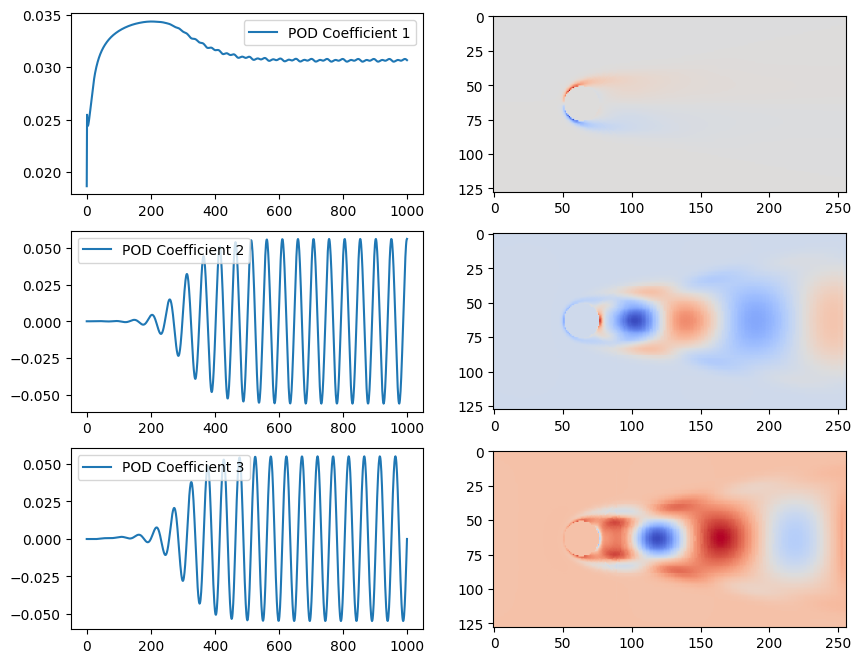

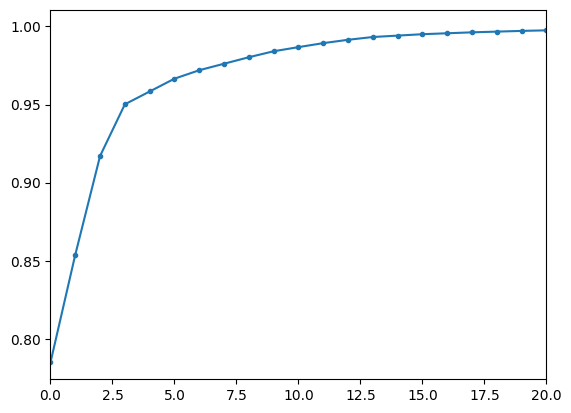

In [8]:
"""
其实在数学上，不用计算协方差矩阵再求特征值，
也可以通过SVD方法计算POD，
这里我们直接调用numpy的SVD函数来计算POD。
"""
import numpy as np
import matplotlib.pyplot as plt

dataset = np.load('data/vorticity_dataset.npy')
dataset = dataset - np.mean(dataset, axis=0)

U, S, Vt = np.linalg.svd(dataset, full_matrices=False)
print(U.shape, S.shape, Vt.shape)

k = 3
time_coeffs = Vt[:k, :]  # 前 k 个右奇异向量（空间模式）
pod_modes = U[:, :k] @ np.diag(S[:k])  # 前 k 个时间系数

plt.figure(figsize=(10, 8))
for i in range(3):
    plt.subplot(3, 2, 2*i+1)
    plt.plot(time_coeffs[i], label=f'POD Coefficient {i+1}')
    plt.legend()
    plt.subplot(3, 2, 2*i+2)
    plt.imshow(pod_modes[:, i].reshape(128, 256), cmap='coolwarm')


energy = S**2 / np.sum(S**2)
accumulated_energy = np.cumsum(energy)
plt.figure()
plt.plot(accumulated_energy, '.-')
plt.xlim(0, 20)

plt.show()

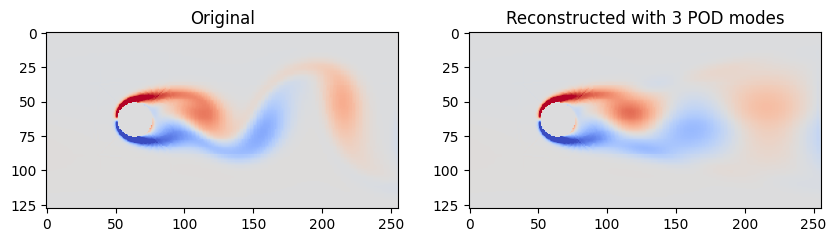

In [ ]:
"""
重构
"""

reconstructed = pod_modes @ time_coeffs

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(dataset[:, 500].reshape(128, 256), cmap='coolwarm', vmin=-5, vmax=5)
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed[:, 500].reshape(128, 256), cmap='coolwarm', vmin=-5, vmax=5)
plt.title('Reconstructed with 3 POD modes')
plt.show()


(32768, 400) (400,) (400, 400)


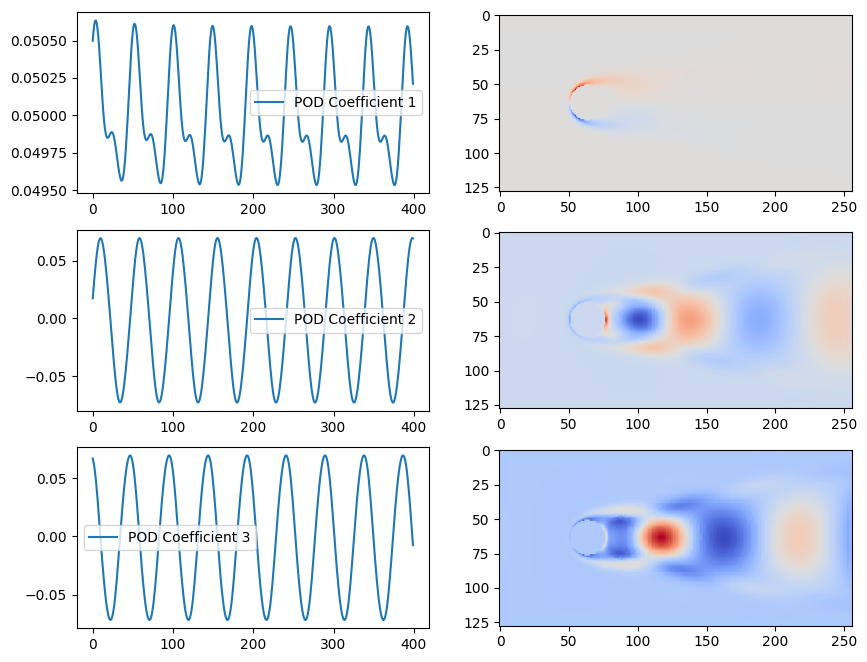

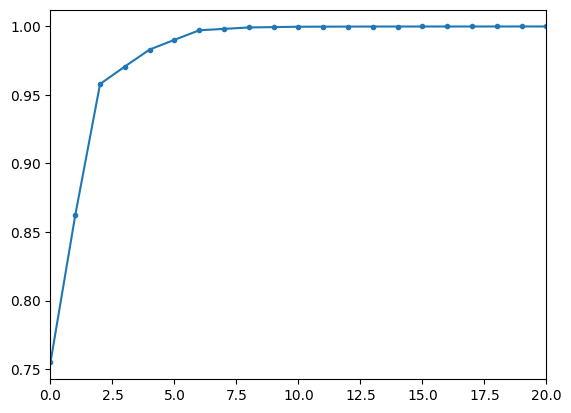

In [9]:
"""
只对周期性圆柱绕流进行POD分解
"""

import numpy as np
import matplotlib.pyplot as plt

dataset = np.load('data/vorticity_dataset.npy')[:, 600:]
dataset = dataset - np.mean(dataset, axis=0)

U, S, Vt = np.linalg.svd(dataset, full_matrices=False)
print(U.shape, S.shape, Vt.shape)

k = 3
time_coeffs = Vt[:k, :]
pod_modes = U[:, :k] @ np.diag(S[:k])

plt.figure(figsize=(10, 8))
for i in range(3):
    plt.subplot(3, 2, 2*i+1)
    plt.plot(time_coeffs[i], label=f'POD Coefficient {i+1}')
    plt.legend()
    plt.subplot(3, 2, 2*i+2)
    plt.imshow(pod_modes[:, i].reshape(128, 256), cmap='coolwarm')
    
energy = S**2 / np.sum(S**2)
accumulated_energy = np.cumsum(energy)
plt.figure()
plt.plot(accumulated_energy, '.-')
plt.xlim(0, 20)

plt.show()

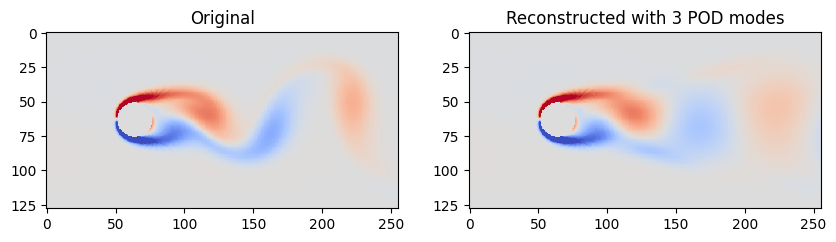

In [3]:
"""
重构
"""

reconstructed = pod_modes @ time_coeffs

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(dataset[:, 0].reshape(128, 256), cmap='coolwarm', vmin=-5, vmax=5)
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed[:, 0].reshape(128, 256), cmap='coolwarm', vmin=-5, vmax=5)
plt.title('Reconstructed with 3 POD modes')
plt.show()


### 动态模态分解 DMD

动态模态分解（Dynamic mode decomposition, DMD）是一种模态分解方法，它将时间解析的流场数据分解成多个具有单一特征频率信息的模态。DMD方法首先由Schmid在美国物理协会演讲中提出，并随后发表。DMD方法得到的每个分解模态$\bm\phi_j(\bm\xi)$都以一个特定的频率和增长/衰减率相连，则模态分解方程可以写成如下形式，

$$\bm u(\bm x, t) - \bar{\bm u}(x) = \sum_j c_j e^{\lambda_j t} \bm\phi_j(\bm\xi)$$

式中 $\lambda_j$——决定DMD模态的增长/衰减速以及振荡频率

从上式中可以看出DMD方法适用于线性动力系统，但对于非线性系统，DMD能给出基于数据的最佳线性算子来近似该非线性系统。Rowley等人指出DMD方法和Koopman算子方法的联系，在非线性系统中的DMD方法相当于对原始观察量的Koopman算子的有限维近似。因此当DMD方法应用于强非线性系统时，其预测的未来时刻下的状态往往不可信。DMD方法作为一种基于矩阵的线性代数方法，除了结果稳定外，还可以很方便的进行推广和改进。通常来说，DMD被视为是结合了POD方法和离散Fourier变换的优势的方法，它可以直接从数据中识别时空相干结构，因此DMD方法除了在流体力学中应用外，还被广泛应用于金融、视频处理、机器人科学、神经科学等。

### DMD计算

DMD目标是找到一个近似的线性动力系统：

$$\bm x_{k+1} = \bm A \bm x_k$$

其中，$\bm A \in \mathbb{R}^{m\times m}$ 是状态转移矩阵。DMD 的核心思想是通过数据构造矩阵 $\bm A$ 的谱分解，从而提取系统的动态模态和对应的频率。

我们将数据分为两个矩阵:
$$
\bm X_1 = [\bm x_1, \bm x_2, ..., \bm x_{n-1}] \\
\bm X_2 = [\bm x_2, \bm x_3, ..., \bm x_{n}] \\
\bm X_2 \approx \bm A \bm X_1
$$

1. 对$\bm X_1$进行SVD分解
   $$\bm X_1 =  \bm U \bm \Sigma \bm V^T$$
2. 利用 SVD 的结果，将$\bm A$投影到低维空间
   a. 代入SVD结果
   $$ \bm X_2 \approx \bm A(\bm U \bm \Sigma \bm V^T) $$
   b. 左乘$\bm U^T$:
   $$\bm U^T \bm X_2 \approx (\bm U^T\bm A \bm U) \bm \Sigma \bm V^T$$
   c. 令 $\bm{\tilde A} = \bm U^T\bm A\bm U$ （是$\bm A$在低维子空间中的投影）
   $$\bm U^T\bm X_2 \approx \bm{\tilde A}\bm \Sigma\bm V^T$$
   d. 右乘$\bm V\bm \Sigma^{-1}$
   $$\bm{\tilde A} = \bm U^T\bm X_2\bm V\bm \Sigma^{-1}$$
1. 对降维矩阵$\bm{\tilde A}$进行特征值分解
   $$\bm{\tilde A}\bm w_i = \mu_i\bm w_i$$
2. 将降维空间中的特征向量映射回原始空间，得到 DMD 模态
   $$\Phi = \bm X_2\bm V\bm \Sigma^{-1}\bm W$$
3. 重构时间演化
   $$\bm x(t) = \sum_{i=1}^r b_i\phi_ie^{\omega_it}$$


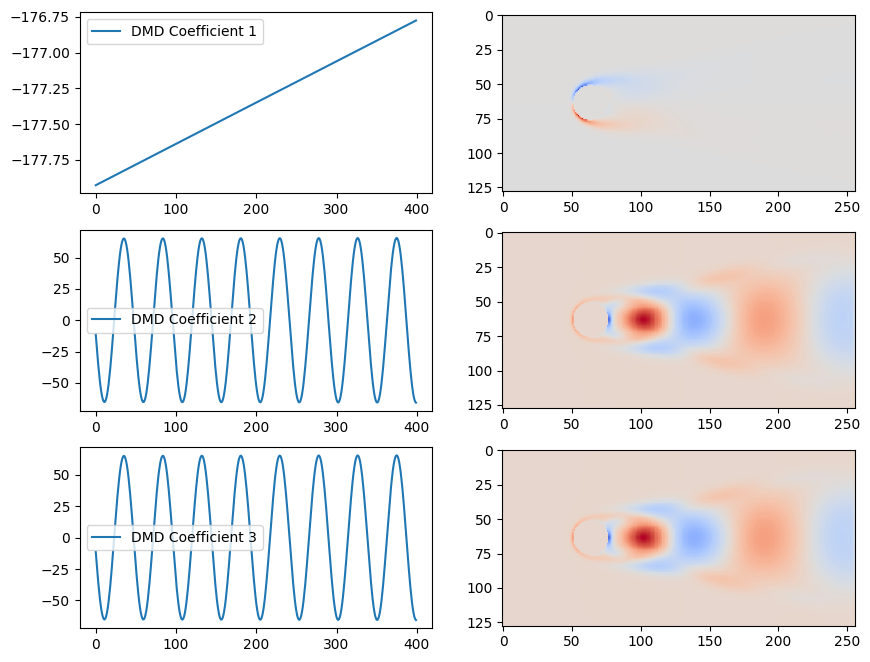

In [16]:
import numpy as np
from numpy import dot, diag, multiply, power
from numpy.linalg import svd, inv, pinv
import matplotlib.pyplot as plt

# Definition of DMD
# Dynamic Mode Decomposition

def snapshot_dmd(snapshots, snapshots_prime, rank=None):
    try:
        t,m,n = snapshots.shape
    except:
        raise EOFError('Error: wrong shape of the input snapshots')

    X = snapshots.reshape([t, m * n]).T
    Y = snapshots_prime.reshape([t, m * n]).T

    modes, coefs = dmd(X,Y,rank)
    modes = modes.reshape([-1,m,n])

    return modes, coefs


def dmd(X, Y, rank=None):

    U2, Sig2, Vh2 = svd(X, False)

    # rank truncation
    if not rank:
        rank = len(X[0])
    U = U2[:, :rank]
    S = diag(Sig2)[:rank, :rank]
    V = Vh2.conj().T[:, :rank]

    # definition of virtual time domain
    t = np.linspace(0, len(X[0]) + 1, len(X[0]) + 1)
    dt = t[1] - [0]

    # build A tilde
    A_tilde = dot(dot(dot(U.conj().T, Y), V), inv(S))
    mu, W = np.linalg.eig(A_tilde)

    idx = mu.argsort()[::-1]
    mu = mu[idx]
    W = W[:, idx]

    # build DMD modes
    Phi = dot(dot(dot(Y, V), inv(S)), W)

    # compute time evolution
    b = dot(pinv(Phi), X[:, 0])
    Psi = np.zeros([rank, len(t)], dtype='complex')
    for i, _t in enumerate(t):
        Psi[:, i] = multiply(power(mu, _t / dt), b)

    modes = Phi.T
    coefs = Psi

    return modes, coefs


dataset = np.load('data/vorticity_dataset.npy')[:, 600:]
t = dataset.shape[1]
NX, NY = 128, 256
dataset = dataset.T.reshape([t, NX, NY])

modes, coefs = snapshot_dmd(dataset[:-1], dataset[1:], rank=3)

plt.figure(figsize=(10, 8))
for i in range(3):
    plt.subplot(3, 2, 2*i+1)
    plt.plot(coefs[i].real, label=f'DMD Coefficient {i+1}')
    plt.legend()
    plt.subplot(3, 2, 2*i+2)
    plt.imshow(modes[i].real, cmap='coolwarm')

plt.show()

In [ ]:
"""
重构
"""

initial = dataset[0]
prediction = np.zeros_like(dataset)
prediction[0] = initial
for i in range(100):
    prediction[i+1] = np.dot(modes, coefs[:, i]).real
